<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/02_TF_2_x_2_LogisticRegression_MultiClassification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

binary classification의 정답 종류 2개(0 or 1) => sigmoid는 0.5 기준으로 0/1 나누므로 출력층 노드 수는 1개면 됨.

multiple classification의 정답 종류 n개(0, 1, 2, ..., n) => 출력노드는 정답의 수인 n 

## One-Hot

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
import numpy as np

try:
    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

except Exception as err:

    print(str(err))   

이항분류를 다중분류 one-hot encoding으로 변경

In [ ]:
# one-hot encoding

t_data_one_hot = tf.keras.utils.to_categorical(t_data, num_classes = 2) # num_classes: 정답 종류 수

print(t_data.shape, t_data_one_hot.shape)

print(t_data[:2], '\n', t_data_one_hot[:2])

(759, 1) (759, 2)
[[0.]
 [1.]] 
 [[1. 0.]
 [0. 1.]]


In [ ]:
# Logistic regression을 keras로 생성
# 다중 분류이므로 출력층은 softmax 함수 적용

# Functional API

input_ = Input(shape = (x_data.shape[1], ))

output_ = Dense(t_data_one_hot.shape[1], activation = 'softmax')(input_)

model = Model(inputs = input_, outputs = output_)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습을 위한 optimizer, loss 정의

model.compile(optimizer = SGD(learning_rate = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data_one_hot, epochs=300, validation_split=0.2, verbose=2)

end_time = datetime.now()
print("\n Elapsed Time =>", start_time-end_time)

Epoch 1/300
19/19 - 1s - loss: 0.6653 - accuracy: 0.5997 - val_loss: 0.6618 - val_accuracy: 0.6053 - 870ms/epoch - 46ms/step
Epoch 2/300
19/19 - 0s - loss: 0.6503 - accuracy: 0.6672 - val_loss: 0.6509 - val_accuracy: 0.6316 - 59ms/epoch - 3ms/step
Epoch 3/300
19/19 - 0s - loss: 0.6393 - accuracy: 0.6722 - val_loss: 0.6429 - val_accuracy: 0.6513 - 85ms/epoch - 4ms/step
Epoch 4/300
19/19 - 0s - loss: 0.6311 - accuracy: 0.6837 - val_loss: 0.6368 - val_accuracy: 0.6513 - 75ms/epoch - 4ms/step
Epoch 5/300
19/19 - 0s - loss: 0.6246 - accuracy: 0.6837 - val_loss: 0.6319 - val_accuracy: 0.6447 - 86ms/epoch - 5ms/step
Epoch 6/300
19/19 - 0s - loss: 0.6195 - accuracy: 0.6771 - val_loss: 0.6279 - val_accuracy: 0.6447 - 52ms/epoch - 3ms/step
Epoch 7/300
19/19 - 0s - loss: 0.6151 - accuracy: 0.6787 - val_loss: 0.6245 - val_accuracy: 0.6382 - 52ms/epoch - 3ms/step
Epoch 8/300
19/19 - 0s - loss: 0.6114 - accuracy: 0.6787 - val_loss: 0.6214 - val_accuracy: 0.6513 - 50ms/epoch - 3ms/step
Epoch 9/300
19

In [ ]:
model.evaluate(x_data, t_data_one_hot)

24/24 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7681


[0.47703731060028076, 0.7681159377098083]

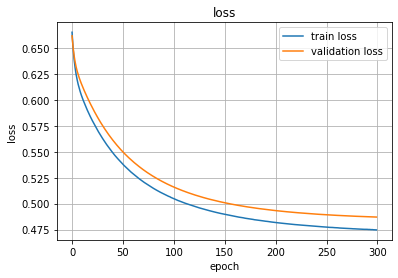

In [ ]:
import matplotlib.pyplot as plt

plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

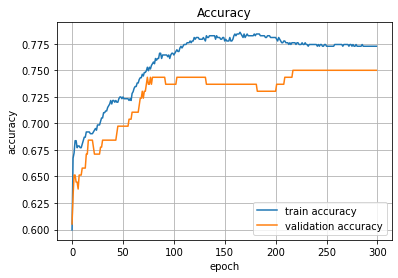

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show()

## Sparse

In [ ]:
import numpy as np

try:
    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

except Exception as err:

    print(str(err))

In [ ]:
input_ = Input(shape = (x_data.shape[1], ))

output_ = Dense(2, activation = 'softmax')(input_) # output 종류 2개

model = Model(inputs = input_, outputs = output_)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=300, validation_split=0.2)

end_time = datetime.now()

print('\nElapsed Time => ', start_time - end_time)

Epoch 1/300
19/19 [==============================] - 0s 10ms/step - loss: 0.6718 - accuracy: 0.6326 - val_loss: 0.6461 - val_accuracy: 0.6579
Epoch 2/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6343 - val_loss: 0.6417 - val_accuracy: 0.6513
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6359 - val_loss: 0.6378 - val_accuracy: 0.6513
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6598 - accuracy: 0.6359 - val_loss: 0.6344 - val_accuracy: 0.6513
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6392 - val_loss: 0.6313 - val_accuracy: 0.6513
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6425 - val_loss: 0.6284 - val_accuracy: 0.6513
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.6425 - val_loss: 0.6258 - val_accuracy: 0.6513
Epoch 8/300


In [ ]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7642


[0.4861847162246704, 0.7641633749008179]

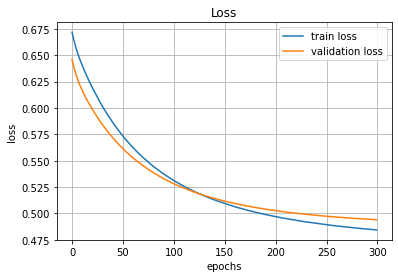

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

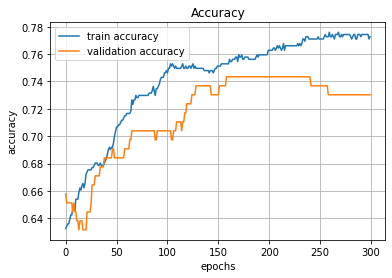

In [ ]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()